# Работа с гипотезами для увеличения выручки

## Описание проекта:

Мы работаем с аналитиком крупного интернет-магазина. Вместе с отделом маркетинга мы подготовили список гипотез для увеличения выручки.
Нам необходимо приоритизировать гипотезы, запустить A/B-тест и проанализировать результаты.

### Часть 1. Приоритизация гипотез:

В файле /datasets/hypothesis.csv 9 гипотез по увеличению выручки интернет-магазина с указанными параметрами Reach, Impact, Confidence, Effort.

Нам необходимо:

- Применить фреймворк ICE для приоритизации гипотез. Отсортировать их по убыванию приоритета;
- Примените фреймворк RICE для приоритизации гипотез. Отсортируйте их по убыванию приоритета;
- Проанализировать результаты приоритизации гипотез при применении RICE/ICE. Объяснить в чем разница.

### Часть 2. Анализ A/B-теста

У нас есть результаты A/B-теста, которые описаны в файлах /datasets/orders.csv и /datasets/visitors.csv.

Нам необходимо проанализировать A/B-тест:


- Построить график кумулятивной выручки по группам. Сделать выводы и предположения;
- Построить график кумулятивного среднего чека по группам. Сделать выводы и предположения;
- Построить график относительного изменения кумулятивного среднего чека группы B к группе A. Сделать выводы и предположения;
- Построить график кумулятивной конверсии по группам. Сделать выводы и предположения;
- Построить график относительного изменения кумулятивной конверсии группы B к группе A. Сделать выводы и предположения;
- Построить точечный график количества заказов по пользователям. Сделать выводы и предположения;
- Посчитать 95-й и 99-й перцентили количества заказов на пользователя. Выбраь границу для определения аномальных пользователей;
- Построить точечный график стоимостей заказов. Сделать выводы и предположения;
- Посчитать 95-й и 99-й перцентили стоимости заказов. Выберать границу для определения аномальных заказов;
- Посчитать статистическую значимость различий в конверсии между группами по «сырым» данным. Сделать выводы и предположения;
- Посчитать статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным. Сделать выводы и предположения;
- Посчитать статистическую значимость различий в конверсии между группами по «очищенным» данным. Сделать выводы и предположения;
- Посчитать статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным. Сделать выводы и предположения;
- Принять решение по результатам теста и объясните его. 

Варианты решений: 

   1. Остановить тест, зафиксировать победу одной из групп;
   2. Остановить тест, зафиксировать отсутствие различий между группами;
   3. Продолжить тест.
   
### Описание данных:

Данные для первой части

Файл /datasets/hypothesis.csv:

- Hypothesis — краткое описание гипотезы;
- Reach — охват пользователей по 10-балльной шкале;
- Impact — влияние на пользователей по 10-балльной шкале;
- Confidence — уверенность в гипотезе по 10-балльной шкале;
- Efforts — затраты ресурсов на проверку гипотезы по 10-балльной шкале. Чем больше значение Efforts, тем дороже проверка гипотезы.
- Данные для второй части

Файл /datasets/orders.csv:

- transactionId — идентификатор заказа;
- visitorId — идентификатор пользователя, совершившего заказ;
- date — дата, когда был совершён заказ;
- revenue — выручка заказа;
- group — группа A/B-теста, в которую попал заказ.

Файл /datasets/visitors.csv:

- date — дата;
- group — группа A/B-теста;
- visitors — количество пользователей в указанную дату в указанной группе A/B-теста.


## Оглавление:
I.   [Открытие и предобработка данных](#start)
 * [Первые выводы](#start_conc)
 
II.  [Подготовка данных](#second)

III. [Приоритизация гипотез](#hypo)
 * [Выводы](#conc_2)

IV.  [Анализ A/B-теста](#a_b)
 * [Построим график кумулятивной выручки по группам](#cumm_rev_group)
 * [Построим график кумулятивного среднего чека по группам](#cumm_avg_rev)
 * [Построим график относительного изменения кумулятивного среднего чека группы B к группе A](#cumm_avg_rev_B_A)
 * [Построим график кумулятивной конверсии по группам](#conv)
 * [Построим график относительного изменения кумулятивной конверсии группы B к группе A](#conv_B_A)
 * [Построим точечный график количества заказов по пользователям](#orders_visitors)
 * [Посчитаем 95-й и 99-й перцентили количества заказов на пользователя](#95_99)
 * [Построим точечный график стоимостей заказов](#orders_price)
 * [Посчитаем 95-й и 99-й перцентили стоимости заказов](#95_99_2)
 * [Посчитаем статистическую значимость различий в конверсии между группами по «сырым» данным](#raw_data)
 * [Посчитаем статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным](#raw_data_2)
 * [Посчитаем статистическую значимость различий в конверсии между группами по «очищенным» данным](#good_data)
 * [Посчитаем статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным](#good_data_2)

V.  [Общий вывод](#final_conc)

## I. Открытие данных  <a id="start"></a>

##### Подключим необходимые библиотеки python

In [1]:
import pandas as pd
pd.set_option('max_colwidth', 400)
from IPython.display import display
import seaborn as sns
from matplotlib import pyplot as plt
import matplotlib.ticker as ticker
import numpy as np
import scipy.stats as stats
from IPython.display import display
%matplotlib inline
from io import BytesIO
import requests
import warnings

warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', 30)

##### Загрузим данные

In [2]:
def data_from_g_sheets(spreadsheet_id):
    file_name = 'https://docs.google.com/spreadsheets/d/{}/export?format=csv'.format(spreadsheet_id)
    r = requests.get(file_name)
    return pd.read_csv(BytesIO(r.content))

In [3]:
try:
    hypothesis = pd.read_csv('/datasets/hypothesis.csv')
    orders = pd.read_csv('/datasets/orders.csv')
    visitors = pd.read_csv('/datasets/visitors.csv')
except:
    hypothesis = data_from_g_sheets('1xU5bm6wJJIWRWnE3-E0eHddYxpTog-F32fqwoJHfBVs')
    orders = data_from_g_sheets('1QLVr3CsH4Ui_jBUNLswlSarFDKg-PH3ww87jMcNHqFU')
    visitors = data_from_g_sheets('1z1vZxqnqUbDSkpNFcoENtTnxODXpIHqCpshm-B6Du4E')

In [4]:
list_of_data = [hypothesis, orders, visitors]

for data in list_of_data:
    display(data.head(5))
    print(data.info())
    print(data.isna().mean())

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Hypothesis  9 non-null      object
 1   Reach       9 non-null      int64 
 2   Impact      9 non-null      int64 
 3   Confidence  9 non-null      int64 
 4   Efforts     9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes
None
Hypothesis    0.0
Reach         0.0
Impact        0.0
Confidence    0.0
Efforts       0.0
dtype: float64


,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1197 non-null   int64 
 1   visitorId      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB
None
transactionId    0.0
visitorId        0.0
date             0.0
revenue          0.0
group            0.0
dtype: float64


,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB
None
date        0.0
group       0.0
visitors    0.0
dtype: float64


In [5]:
display(visitors.head(5))

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


In [6]:
uniq_a_visitors = pd.DataFrame(visitors.query('group == "A"')['visitors'].unique())
uniq_a_visitors.columns = ['visitors']

uniq_b_visitors = pd.DataFrame(visitors.query('group == "B"')['visitors'].unique())
uniq_b_visitors.columns = ['visitors']

cross_visitors = uniq_a_visitors.join(uniq_b_visitors, on='visitors', how='inner', lsuffix='_left', rsuffix='_right')
display(cross_visitors)

,visitors,visitors_left,visitors_right


### Вывод: <a id="start_conc"></a>
Пропусков данных и "переткающих" посететелей между группами нет, но столбцы с датами представлены в формате Object. Это нужно исправить. Также в таблицах нужно привести данные  столбцов к нижнему регистру.

## II. Подготовка данных  <a id="second"></a>

In [7]:
hypothesis.columns = [col.lower() for col in hypothesis.columns]
visitors.columns = [col.lower() for col in visitors.columns]
orders.columns = [col.lower() for col in orders.columns]

In [8]:
orders['date'] = pd.to_datetime(orders['date'])
visitors['date'] = pd.to_datetime(visitors['date'])

## III. Приоритезация гипотез  <a id="hypo"></a>

In [9]:
display(hypothesis.head(5))

,hypothesis,reach,impact,confidence,efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1


##### Применим фреймворк ICE для приоритизации гипотез. 

In [10]:
hypothesis['ICE'] = hypothesis['impact'] * hypothesis['confidence'] / hypothesis['efforts']

##### Отсортируем их по убыванию приоритета.

In [11]:
display(hypothesis[['hypothesis', 'ICE']].sort_values(by='ICE', ascending=False))

,hypothesis,ICE
8,"Запустить акцию, дающую скидку на товар в день рождения",16.200000
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",13.333333
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",11.200000
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",8.000000
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",7.000000
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2.000000
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",1.333333
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",1.125000
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",1.000000


##### Применим фреймворк RICE для приоритизации гипотез. 

In [12]:
hypothesis['RICE'] = hypothesis['reach'] * hypothesis['impact'] * hypothesis['confidence'] / hypothesis['efforts']

##### Отсортируем их по убыванию приоритета.

In [13]:
display(hypothesis[['hypothesis', 'RICE']].sort_values(by='RICE',ascending=False))

,hypothesis,RICE
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",112.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",56.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",40.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",40.0
8,"Запустить акцию, дающую скидку на товар в день рождения",16.2
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",9.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",4.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",4.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3.0


##### Разберемся, как изменилась приоритезация гипотез при применении RICE вместо ICE.

In [14]:
hypothesis = hypothesis.sort_values(by='RICE',ascending=False)
display(hypothesis)

,hypothesis,reach,impact,confidence,efforts,ICE,RICE
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5,11.200000,112.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3,7.000000,56.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6,13.333333,40.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3,8.000000,40.0
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5,16.200000,16.2
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8,1.125000,9.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10,2.000000,4.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3,1.333333,4.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1,1.000000,3.0


### Вывод: <a id="conc_2"></a>
Разница в рейтинге существенна. К примеру, гипотеза "Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок" по методу преоритезации RICE находится на первом месте, тогда как по ICE она была у нас на третьем. Такой эффект дает охват (Reach), который не учитывается в ICE, но по факту имеет большое знаечение и используется в формуле расчета RICE.

## IV. Анализ A/B-теста <a id="a_b"></a>

### 1. Построим график кумулятивной выручки по группам. <a id="cumm_rev_group"></a>

In [15]:
display(orders.head(5))

,transactionid,visitorid,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


In [16]:
display(visitors.head(5))

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


##### Cоздаем массив уникальных пар значений дат и групп теста.

In [17]:
datesGroups = orders[['date','group']].drop_duplicates()

##### Получим агрегированные кумулятивные по дням данные о заказах.

In [18]:
ordersAggregated = datesGroups.apply(lambda x: orders[np.logical_and(orders['date'] <= x['date'], 
                                                                     orders['group'] == x['group'])]\
                                                                    .agg({'date' : 'max', 
                                                                          'group' : 'max', 
                                                                          'transactionid' : pd.Series.nunique, 
                                                                          'visitorid' : pd.Series.nunique, 
                                                                          'revenue' : 'sum'}), axis=1)\
                                                                    .sort_values(by=['date','group']) 

##### Получим агрегированные кумулятивные по дням данные о посетителях интернет-магазина.

In [19]:
visitorsAggregated = datesGroups.apply(lambda x: visitors[np.logical_and(visitors['date'] <= x['date'], 
                                                                         visitors['group'] == x['group'])] \
                                                                           .agg({'date' : 'max', 
                                                                                 'group' : 'max', 
                                                                                 'visitors' : 'sum'}), axis=1) \
                                                                            .sort_values(by=['date','group'])

##### Объединим кумулятивные данные в одной таблице и присваивоим ее столбцам понятные названия.

In [20]:
cumulativeData = ordersAggregated.merge(visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group'])
cumulativeData.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']

display(cumulativeData.head(5)) 

,date,group,orders,buyers,revenue,visitors
0,2019-08-01,A,24,20,148579,719
1,2019-08-01,B,21,20,101217,713
2,2019-08-02,A,44,38,242401,1338
3,2019-08-02,B,45,43,266748,1294
4,2019-08-03,A,68,62,354874,1845


##### Датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе А и группы B.

In [21]:
cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'orders']]
cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'orders']]

##### Строим график выручки группы А и группы B.

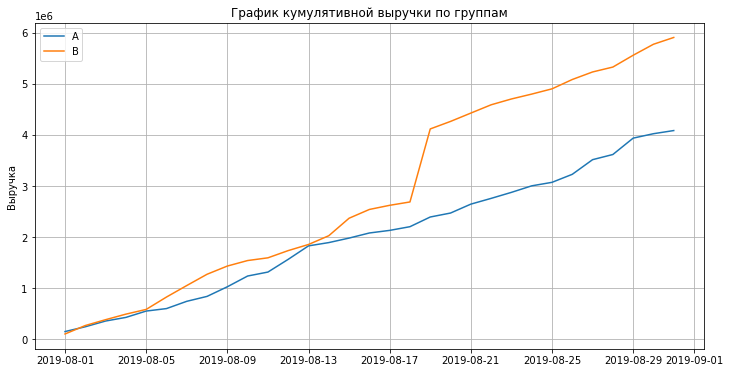

In [22]:
#pd.options.mode.chained_assignment = None

from pandas.plotting import register_matplotlib_converters 
register_matplotlib_converters()
    
plt.figure(figsize=(12,6))
plt.grid(True)
plt.title('График кумулятивной выручки по группам')
#plt.xlabel('Дата')
plt.ylabel('Выручка')

plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B')

plt.legend()
plt.show()

#### Вывод:

Графики выручки группы А растет равномерно, а на графике B есть всплеск 20.08.2019. Это может сигнализировать о резком увеличении числа заказов, либо о появлении очень дорогих заказов в выборке.

### 2. Построим график кумулятивного среднего чека по группам. <a id="cumm_avg_rev"></a>

##### Построим графики среднего чека по группам — разделим кумулятивную выручку на кумулятивное число заказов.

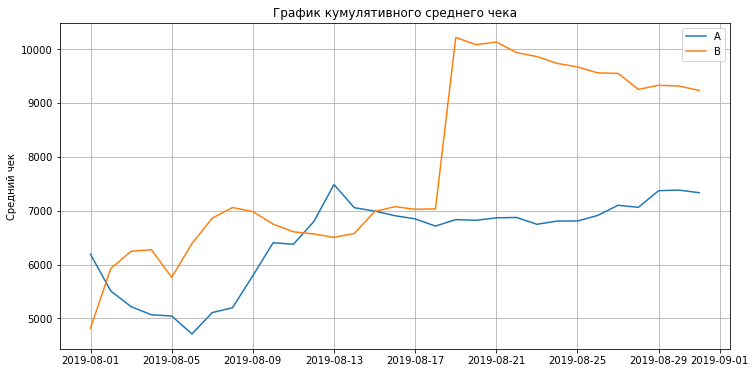

In [23]:
plt.figure(figsize=(12,6))
plt.grid(True)
plt.title('График кумулятивного среднего чека')
#plt.xlabel('Дата')
plt.ylabel('Средний чек')

plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='B')
plt.legend()
plt.show()

#### Вывод:

Средний чек группы А становится равномерным ближе к концу теста и фиксируется около 7 тыс. руб. Группа B выглядит неоднозначно - в середние теста происходит резкий всплеск. Видимо случился какой-то большой заказ. После него средний чек снижается к концу теста с 10 тыс. руб. до 9 тыс. руб.

### 3. Построим график относительного изменения кумулятивного среднего чека группы B к группе A. <a id="cumm_avg_rev_B_A"></a>

##### Собирем данные в одном датафрейме.

In [24]:
mergedCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB, left_on='date', 
                                                                       right_on='date', 
                                                                       how='left', 
                                                                       suffixes=['A', 'B'])

##### Строим отношение средних чеков.

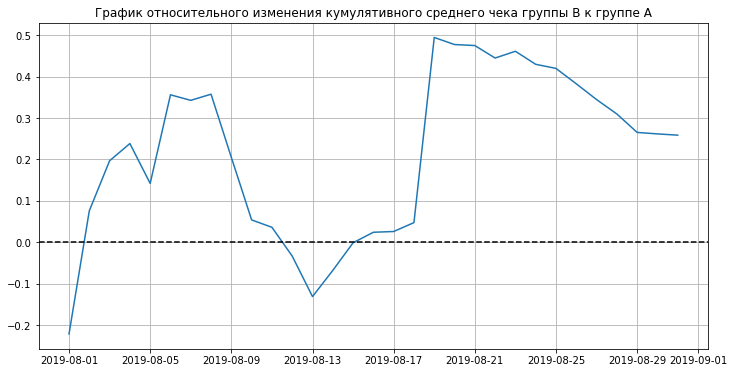

In [25]:
plt.figure(figsize=(12,6))
plt.grid(True)
plt.title('График относительного изменения кумулятивного среднего чека группы B к группе A')



plt.plot(mergedCumulativeRevenue['date'], 
         (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])/ \
         (mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1)

plt.axhline(y=0, color='black', linestyle='--')
plt.show()

### Вывод:

В нескольких точках график различия между сегментами резко «скачет». Нужно исключить из выборок завышенные заказы.

### 4. Построим график кумулятивной конверсии по группам. <a id="conv"></a>

##### Считаем кумулятивную конверсию

In [26]:
cumulativeData['conversion'] = cumulativeData['orders']/cumulativeData['visitors']

##### Отделяем данные по группе A

In [27]:
cumulativeDataA = cumulativeData[cumulativeData['group']=='A']

#####  Отделяем данные по группе B

In [28]:
cumulativeDataB = cumulativeData[cumulativeData['group']=='B']

##### Построим графики

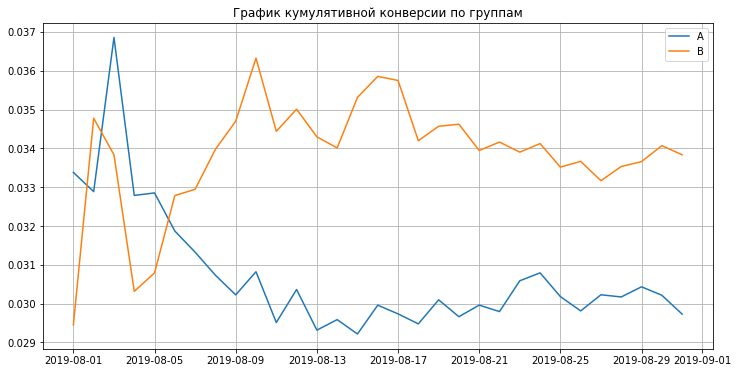

In [29]:
plt.figure(figsize=(12,6))
plt.grid(True)
plt.title('График кумулятивной конверсии по группам')


plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='B')
plt.legend()
plt.show()

### Вывод:

Конверсия группы В выше чем у группы А. Это видно на графике начиная с 06.08.2019

### 5. Построим график относительного изменения кумулятивной конверсии группы B к группе A.  <a id="conv_B_A"></a>

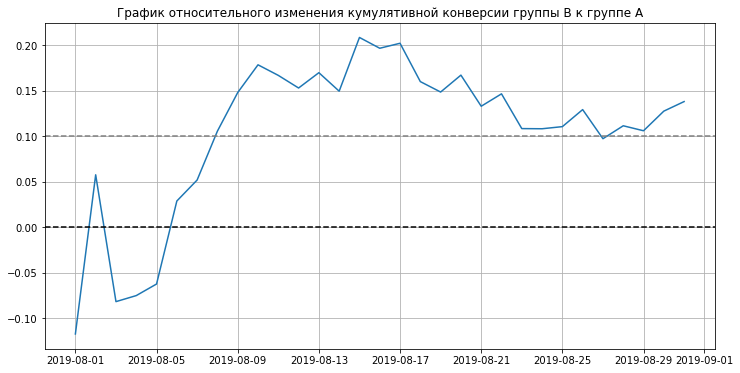

In [30]:
plt.figure(figsize=(12,6))
plt.grid(True)
plt.title('График относительного изменения кумулятивной конверсии группы B к группе A')


mergedCumulativeConversions = cumulativeDataA[['date','conversion']].merge(cumulativeDataB[['date','conversion']], 
                                                                           left_on='date', 
                                                                           right_on='date', 
                                                                           how='left', 
                                                                           suffixes=['A', 'B'])

plt.plot(mergedCumulativeConversions['date'], mergedCumulativeConversions['conversionB']/ \
         mergedCumulativeConversions['conversionA']-1)


plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=+0.1, color='grey', linestyle='--')


plt.show()

### Вывод:

В начале теста группа B значительно проигрывала группе A, затем вырвалась вперёд. Потом её конверсия слегка снижалась, относительно своего же максимума, но не группы A.
В целом отношение конверсии на стороне группы B, но для лучшего понимания нам стоит проанализировать аномалии. Возможно, они изменят картину.

### 6. Построим точечный график количества заказов по пользователям. <a id="orders_visitors"></a>


In [31]:
ordersByUsers = orders.drop(['revenue', 'date'], 
                          axis=1).groupby(['visitorid', 'group'],as_index=False).agg({'transactionid' : pd.Series.nunique})
ordersByUsers.columns = ['userid', 'group','orders']
print(ordersByUsers.sort_values(by='orders',ascending=False).head(10))

          userid group  orders
1079  4256040402     A       7
619   2458001652     B       6
511   2038680547     A       5
596   2378935119     B       5
618   2458001652     A       5
595   2378935119     A       4
45     199603092     A       4
941   3717692402     B       4
963   3803269165     B       4
58     237748145     A       4


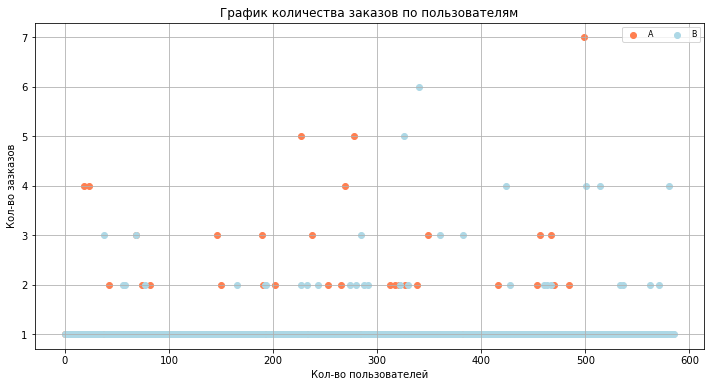

In [32]:
x_a = pd.Series(range(0,len(ordersByUsers.query('group =="A"'))))
x_b = pd.Series(range(0,len(ordersByUsers.query('group =="B"'))))

y_a = pd.Series(ordersByUsers.query('group =="A"')['orders'])
y_b = pd.Series(ordersByUsers.query('group =="B"')['orders'])

plt.figure(figsize=(12,6))
plt.grid(True)
plt.title('График количества заказов по пользователям')
plt.xlabel('Кол-во пользователей')
plt.ylabel('Кол-во зазказов')
x_values = pd.Series(range(0,len(ordersByUsers)))
#plt.savefig('ScatterPlot_05.png')

a = plt.scatter(x_a, y_a, c='coral')
b = plt.scatter(x_b, y_b, c='lightblue')

plt.legend((a , b), 
           ('A', 'B'),
           scatterpoints=1,
           loc='upper right',
           ncol=3,
           fontsize=8)
plt.show()

### Вывод:
Безусловно, большая часть пользователей совершила всего одну покупку. Не столь редким явлением было и 2 покупки на одного пользователя, а вот 4 и больше встречается значительно реже. В любом случае, точная доля не ясна — непонятно, считать покупки больше 4-х на одного пользователя аномалиями или нет. Для этого нам нужно посчитать выборочные перцентили количества заказов на одного пользователя.

### 7. Посчитаем 95-й и 99-й перцентили количества заказов на пользователя. <a id="95_99"></a>

In [33]:
print(np.percentile(ordersByUsers['orders'], [95, 99])) 

[2. 4.]


### Вывод:
Не более 5% пользователей оформляли больше чем 2 заказа и не более 1% оформляли больше 4-х заказов.
Разумно выбрать 2 заказа на одного пользователя за нижнюю границу числа заказов, и отсеять аномальных пользователей по ней.

### 8. Построим точечный график стоимостей заказов. Сделаем выводы и предположения. <a id="orders_price"></a>

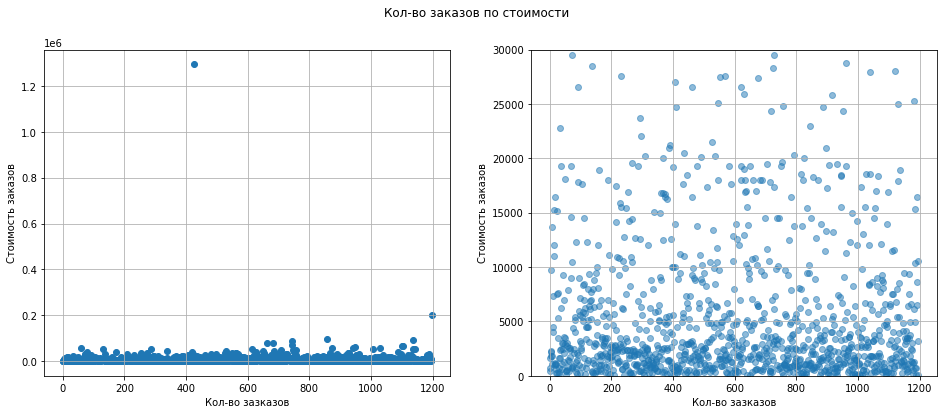

In [34]:
plt.figure(figsize=(16,6))

x_values = pd.Series(range(0,len(orders['revenue'])))

plt.subplot(1, 2, 1)
plt.scatter(x_values, orders['revenue'])
plt.grid(True)
plt.xlabel('Кол-во зазказов')
plt.ylabel('Стоимость заказов')

plt.subplot(1, 2, 2)
plt.scatter(x_values, orders['revenue'], alpha=.5)
plt.ylim(0, 30000)
plt.grid(True)
plt.xlabel('Кол-во зазказов')
plt.ylabel('Стоимость заказов')

plt.suptitle('Кол-во заказов по стоимости')

plt.show()

### Вывод:
Кажется, у нас появился оптовик. Заказ в 1,2 млн. для интернет-магазина выглядит очень большим и выбивается из общей массы. Большая часть заказов у нас меньше 150 тыс. руб.

### 9. Посчитаем 95-й и 99-й перцентили стоимости заказов. Выберем границу для определения аномальных заказов. <a id="95_99_2"></a>

In [35]:
print(np.percentile(orders['revenue'], [95, 99])) 

[28000.  58233.2]


In [36]:
orders.head(3)

,transactionid,visitorid,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A


### Вывод:
Не более 5% заказов дороже 28 000 рублей и не более 1% дороже 58 233.2 рубля. Мы считаем, что стоит отсеять заказы дороже 28 000 тыс. руб. Так мы сильно синизим шум и искажение нашего теста.

### 10. Посчитаем статистическую значимость различий в конверсии между группами по «сырым» данным. <a id="raw_data"></a>

##### Подготовим данные

In [37]:
visitorsADaily = visitors[visitors['group']=='A'][['date', 'visitors']]
visitorsADaily.columns = ['date', 'visitorsPerDateA']

visitorsACummulative = visitorsADaily.apply(lambda x: visitorsADaily[visitorsADaily['date'] <= 
                                                                     x['date']].agg({'date' : 'max', 
                                                                                     'visitorsPerDateA' : 'sum'}), 
                                                                                        axis=1)
visitorsACummulative.columns = ['date', 'visitorsCummulativeA']

visitorsBDaily = visitors[visitors['group']=='B'][['date', 'visitors']]
visitorsBDaily.columns = ['date', 'visitorsPerDateB']

visitorsBCummulative = visitorsBDaily.apply(lambda x: visitorsBDaily[visitorsBDaily['date'] <= 
                                                                     x['date']].agg({'date' : 'max', 
                                                                                     'visitorsPerDateB' : 'sum'}), 
                                                                                        axis=1)
visitorsBCummulative.columns = ['date', 'visitorsCummulativeB']

ordersADaily = orders[orders['group']=='A'][['date', 'transactionid', 'visitorid', 'revenue']]\
    .groupby('date', as_index=False)\
    .agg({'transactionid' : pd.Series.nunique, 'revenue' : 'sum'})
ordersADaily.columns = ['date', 'ordersPerDateA', 'revenuePerDateA']

ordersACummulative = ordersADaily.apply(
    lambda x: \
        ordersADaily[ordersADaily['date'] <= x['date']]\
            .agg({
                'date' : 'max',
                'ordersPerDateA' : 'sum',
                'revenuePerDateA' : 'sum'}), axis=1).sort_values(by=['date'])
ordersACummulative.columns = ['date', 'ordersCummulativeA', 'revenueCummulativeA']

ordersBDaily = orders[orders['group']=='B'][['date', 'transactionid', 'visitorid', 'revenue']]\
    .groupby('date', as_index=False)\
    .agg({'transactionid' : pd.Series.nunique, 'revenue' : 'sum'})
ordersBDaily.columns = ['date', 'ordersPerDateB', 'revenuePerDateB']

ordersBCummulative = ordersBDaily.apply(
    lambda x: \
        ordersBDaily[ordersBDaily['date'] <= x['date']]\
            .agg({
                'date' : 'max',
                'ordersPerDateB' : 'sum',
                'revenuePerDateB' : 'sum'}), axis=1).sort_values(by=['date'])
ordersBCummulative.columns = ['date', 'ordersCummulativeB', 'revenueCummulativeB']

data = ordersADaily.merge(ordersBDaily, left_on='date', right_on='date', how='left')\
    .merge(ordersACummulative, left_on='date', right_on='date', how='left')\
    .merge(ordersBCummulative, left_on='date', right_on='date', how='left')\
    .merge(visitorsADaily, left_on='date', right_on='date', how='left')\
    .merge(visitorsBDaily, left_on='date', right_on='date', how='left')\
    .merge(visitorsACummulative, left_on='date', right_on='date', how='left')\
    .merge(visitorsBCummulative, left_on='date', right_on='date', how='left')

display(data.head(5))

,date,ordersPerDateA,revenuePerDateA,ordersPerDateB,revenuePerDateB,ordersCummulativeA,revenueCummulativeA,ordersCummulativeB,revenueCummulativeB,visitorsPerDateA,visitorsPerDateB,visitorsCummulativeA,visitorsCummulativeB
0,2019-08-01,24,148579,21,101217,24,148579,21,101217,719,713,719,713
1,2019-08-02,20,93822,24,165531,44,242401,45,266748,619,581,1338,1294
2,2019-08-03,24,112473,16,114248,68,354874,61,380996,507,509,1845,1803
3,2019-08-04,16,70825,17,108571,84,425699,78,489567,717,770,2562,2573
4,2019-08-05,25,124218,23,92428,109,549917,101,581995,756,707,3318,3280


In [38]:
### Код ревьюера v1
display(data.head(5))

,date,ordersPerDateA,revenuePerDateA,ordersPerDateB,revenuePerDateB,ordersCummulativeA,revenueCummulativeA,ordersCummulativeB,revenueCummulativeB,visitorsPerDateA,visitorsPerDateB,visitorsCummulativeA,visitorsCummulativeB
0,2019-08-01,24,148579,21,101217,24,148579,21,101217,719,713,719,713
1,2019-08-02,20,93822,24,165531,44,242401,45,266748,619,581,1338,1294
2,2019-08-03,24,112473,16,114248,68,354874,61,380996,507,509,1845,1803
3,2019-08-04,16,70825,17,108571,84,425699,78,489567,717,770,2562,2573
4,2019-08-05,25,124218,23,92428,109,549917,101,581995,756,707,3318,3280


##### Создадим переменные ordersByUsersA и ordersByUsersB со столбцами `userid`, `orders`. В них для пользователей, которые заказывали хотя бы 1 раз, укажем число совершённых заказов.

In [39]:
ordersByUsersA = orders[orders['group']=='A'].groupby('visitorid', 
                                                      as_index=False).agg({'transactionid' : pd.Series.nunique})
ordersByUsersA.columns = ['userid', 'orders']

ordersByUsersB = orders[orders['group']=='B'].groupby('visitorid', 
                                                      as_index=False).agg({'transactionid' : pd.Series.nunique})
ordersByUsersB.columns = ['userid', 'orders'] 

##### Объявим переменные sampleA и sampleB, в которых пользователям из разных групп будет соответствовать количество заказов. Тем, кто ничего не заказал, будут соответствовать нули. Это нужно, чтобы подготовить выборки к проверке критерием Манна-Уитни.

In [40]:
sampleA = pd.concat([ordersByUsersA['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateA'].sum() - \
                                             len(ordersByUsersA['orders'])), name='orders')],axis=0)

sampleB = pd.concat([ordersByUsersB['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateB'].sum() - \
                                            len(ordersByUsersB['orders'])), name='orders')],axis=0) 

##### Сформируем гипотезу

### Гипотеза №1: 

- Нулевая гипотеза: Конверсии в группе A и B одинаковые (по сырым данным);
- Альтернативная гипотеза: Конверсии в группе A и B различаются (по сырым данным);
- Уровень значимости: α == 0.05;
- Посчитаем p-value, используя критерий Манна-Уитни из библиотеки scipy для сравнения среди двух выборок;

- Если p-value будет меньше выбранного уровня значимости α == 0.05, то нулевую гипотезу о равенстве конверсий двух разных групп отвергнем. Иначе сделаем вывод, что данные не позволили нам отвергнуть нулевую гипотезу.

##### Применим критерий и отформатируем p-value, округлив его до трёх знаков после запятой.

In [41]:
ordersByUsersA = orders[orders['group']=='A'].groupby('visitorid', 
                                                      as_index=False).agg({'transactionid' : pd.Series.nunique})
ordersByUsersA.columns = ['userid', 'orders']

ordersByUsersB = orders[orders['group']=='B'].groupby('visitorid', 
                                                      as_index=False).agg({'transactionid' : pd.Series.nunique})
ordersByUsersB.columns = ['userid', 'orders']

sampleA = pd.concat([ordersByUsersA['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateA'].sum() - \
                                                                           len(ordersByUsersA['orders'])), 
                                                                                name='orders')],axis=0)

sampleB = pd.concat([ordersByUsersB['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateB'].sum() - \
                                                                           len(ordersByUsersB['orders'])), 
                                                                                name='orders')],axis=0)
pvalue = stats.mannwhitneyu(sampleA, sampleB)[1]

print('p-значение:',"{0:.3f}".format(pvalue))

print('Разница конверсий:', "{0:.3f}".format(sampleB.mean()/sampleA.mean()-1))


alpha = .05 

if (pvalue < alpha):
    print("p-значение < 0.05, значит отвергаем нулевую гипотезу.")
else:
    print("Не получилось отвергнуть нулевую гипотезу.") 

p-значение: 0.008
Разница конверсий: 0.138
p-значение < 0.05, значит отвергаем нулевую гипотезу.


### Вывод:
Конверсия выше в группе B на 13,8%.
Значит, нулевую гипотезу о том, что статистически значимых различий в конверсии между группами нет, отвергаем.

### 11. Посчитаем статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным. Сделаем выводы и предположения.<a id="raw_data_2"></a>

### Гипотеза №2: 

- Нулевая гипотеза: Средние чеки в группе A и B одинаковые (по сырым данным);
- Альтернативная гипотеза: Средние чеки в группе A и B различаются (по сырым данным);
- Уровень значимости: α == 0.05;
- Посчитаем p-value, используя критерий Манна-Уитни из библиотеки scipy для сравнения среди двух выборок;

- Если p-value будет меньше выбранного уровня значимости α == 0.05, то нулевую гипотезу о равенстве средних чеков двух разных групп отвергнем. Иначе сделаем вывод, что данные не позволили нам отвергнуть нулевую гипотезу.

In [42]:
pvalue = stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], 
                                          orders[orders['group']=='B']['revenue'])[1]

print('p-значение:',"{0:.3f}".format(pvalue))
print('Разница средних чеков:',"{0:.3f}".format(orders[orders['group']=='B']['revenue'].mean()/ \
                       orders[orders['group']=='A']['revenue'].mean()-1))

alpha = .05 

if (pvalue < alpha):
    print("p-значение < 0.05, значит отвергаем нулевую гипотезу.")
else:
    print("Не получилось отвергнуть нулевую гипотезу.") 



p-значение: 0.365
Разница средних чеков: 0.259
Не получилось отвергнуть нулевую гипотезу.


### Вывод:
p-value значительно выше 5%. Значит мы не будем отвергать нулевую гипотезу и считать, что в среднем чеке есть различия. Впрочем, средний чек группы B значительно выше среднего чека группы A, аж на 26%.
Такие противоричивые выводы скорее всего из-за анломалий, от которых мы не очистили выборки.

### 12. Посчитаем статистическую значимость различий в конверсии между группами по «очищенным» данным. Сделаем выводы и предположения. <a id="good_data"></a>

##### Примем за аномальных пользователей тех, кто совершил от 2 заказов или совершил заказ дороже 28 000 рублей. Так мы уберём 5% пользователей с наибольшим числом заказов и от 1% до 5% пользователей с дорогими заказами. Сделаем срезы пользователей с числом заказов больше 2 — usersWithManyOrders и пользователей, совершивших заказы дороже 28 000 — usersWithExpensiveOrders. Объединим их в таблице abnormalUsers.

In [43]:
usersWithManyOrders = pd.concat([ordersByUsersA[ordersByUsersA['orders'] > 2]['userid'], 
                                 ordersByUsersB[ordersByUsersB['orders'] > 2]['userid']], axis = 0)

usersWithExpensiveOrders = orders[orders['revenue'] > 28000]['visitorid']

abnormalUsers = pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis = 0).drop_duplicates().sort_values()
print(abnormalUsers.head(5))

1099    148427295
18      199603092
928     204675465
23      237748145
37      249864742
dtype: int64


##### Узнаем, сколько всего аномальных пользователей

In [44]:
print(abnormalUsers.shape)

(74,)


##### Узнаем, как их действия повлияли на результаты теста. Посчитаем статистическую значимость различий в конверсии между группами теста по очищенным данным. Сначала подготовим выборки количества заказов по пользователям по группам теста:

In [45]:
sampleAFiltered = pd.concat([ordersByUsersA[np.logical_not(ordersByUsersA['userid'].isin(abnormalUsers))]['orders'],
                             pd.Series(0, index=np.arange(data['visitorsPerDateA'].sum() - \
                                                        len(ordersByUsersA['orders'])),
                                                        name='orders')],axis=0)

sampleBFiltered = pd.concat([ordersByUsersB[np.logical_not(ordersByUsersB['userid'].isin(abnormalUsers))]['orders'],
                             pd.Series(0, index=np.arange(data['visitorsPerDateB'].sum() - \
                                                        len(ordersByUsersB['orders'])),
                                                        name='orders')],axis=0) 

### Гипотеза №3: 

- Нулевая гипотеза: Конверсии в группе A и B одинаковые (по очищенным данным);
- Альтернативная гипотеза: Конверсии в группе A и B различаются (по очищенным данным);
- Уровень значимости: α == 0.05;
- Посчитаем p-value, используя критерий Манна-Уитни из библиотеки scipy для сравнения среди двух выборок;

- Если p-value будет меньше выбранного уровня значимости α == 0.05, то нулевую гипотезу о равенстве конверсий двух разных групп отвергнем. Иначе сделаем вывод, что данные не позволили нам отвергнуть нулевую гипотезу.

##### Применим статистический критерий Манна-Уитни к полученным выборкам:

In [46]:
pvalue = stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]

print('p-значение:',"{0:.3f}".format(pvalue))
print('Разница конверсий:', "{0:.3f}".format(sampleBFiltered.mean()/sampleAFiltered.mean()-1))

alpha = .05 

if (pvalue < alpha):
    print("p-значение < 0.05, значит отвергаем нулевую гипотезу.")
else:
    print("Не получилось отвергнуть нулевую гипотезу.") 


p-значение: 0.007
Разница конверсий: 0.173
p-значение < 0.05, значит отвергаем нулевую гипотезу.


### Вывод:
p-value меньше 0.05.
Значит, нулевую гипотезу о том, что статистически значимых различий в конверсии между группами нет, отвергаем. Конверсия выше в группе B на 17,3%.

### 13. Посчитаем статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным.  <a id="good_data_2"></a>

### Гипотеза №4: 

- Нулевая гипотеза: Средние чеки в группе A и B одинаковые (по очищенным данным);
- Альтернативная гипотеза: Средние чеки в группе A и B различаются (по очищенным данным);
- Уровень значимости: α == 0.05;
- Посчитаем p-value, используя критерий Манна-Уитни из библиотеки scipy для сравнения среди двух выборок;

- Если p-value будет меньше выбранного уровня значимости α == 0.05, то нулевую гипотезу о равенстве средних чеков двух разных групп отвергнем. Иначе сделаем вывод, что данные не позволили нам отвергнуть нулевую гипотезу.

In [47]:
pvalue = stats.mannwhitneyu(orders[np.logical_and(
        orders['group']=='A',
        np.logical_not(orders['visitorid'].isin(abnormalUsers)))]['revenue'],
    orders[np.logical_and(
        orders['group']=='B',
        np.logical_not(orders['visitorid'].isin(abnormalUsers)))]['revenue'])[1]
                                   

print('p-значение:',"{0:.3f}".format(pvalue))


print('Разница средних чеков:',"{0:.3f}".format(
    orders[np.logical_and(orders['group']=='B'
                          ,np.logical_not(orders['visitorid'].isin(abnormalUsers)))]['revenue'].mean()/
    orders[np.logical_and(
        orders['group']=='A',
        np.logical_not(orders['visitorid'].isin(abnormalUsers)))]['revenue'].mean() - 1)) 

alpha = .05 

if (pvalue < alpha):
    print("p-значение < 0.05, значит отвергаем нулевую гипотезу.")
else:
    print("Не получилось отвергнуть нулевую гипотезу.") 

p-значение: 0.369
Разница средних чеков: -0.020
Не получилось отвергнуть нулевую гипотезу.


### Вывод:
P-value увеличился, но и разница между сегментами сильно изменилась с +26% до -2%.

## V. Общий вывод:<a id="inal_conc"></a>

##### Вывод по графику кумулятивной выручки по группам:


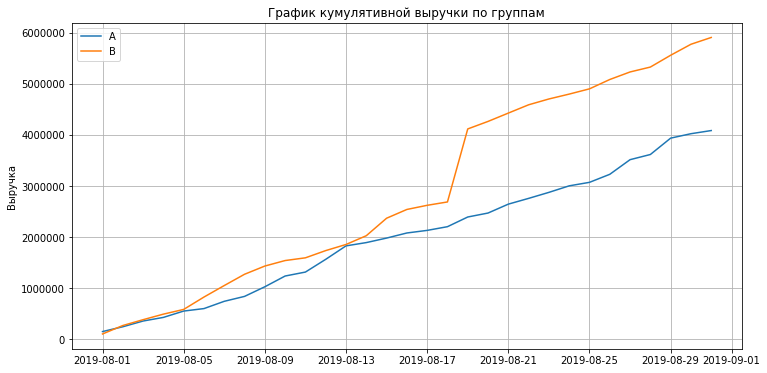


- Выручка группы А растет равномерно, а у группы B есть всплеск 20.08.2019. 
- Это может сигнализировать о резком увеличении числа заказов, либо о появлении очень дорогих заказов в выборке.

##### Вывод по графику кумулятивного среднего чека по группам:

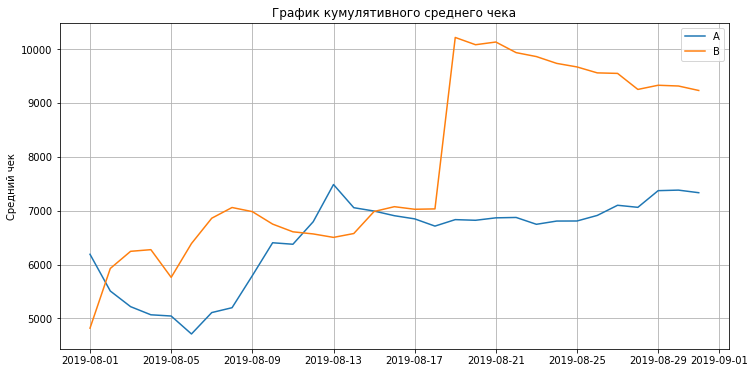


- Средний чек группы А становится равномерным ближе к концу теста и фиксируется около 7 тыс. руб. Группа B выглядит неоднозначно - в середние теста происходит резкий всплеск. 
- Видимо случился какой-то большой заказ. После него средний чек снижается к концу теста с 10 тыс. руб. до 9 тыс. руб.

##### Вывод по графику относительного изменения кумулятивного среднего чека группы B к группе A:

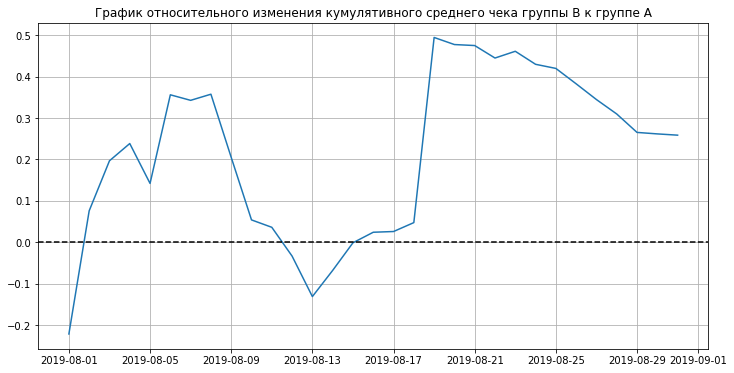

- В нескольких точках график различия между сегментами резко «скачет». Нужно исключить из выборок завышенные заказы.

##### Вывод по графику кумулятивной конверсии по группам:

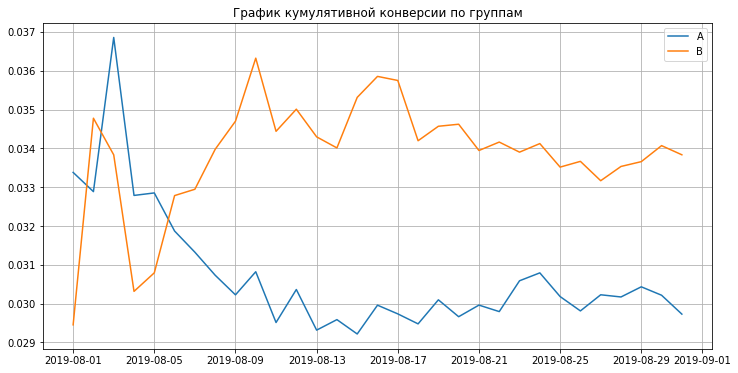

- Конверсия группы В выше чем у группы А. Это видно на графике начиная с 06.08.2019

##### Вывод по графику относительного изменения кумулятивной конверсии группы B к группе A:

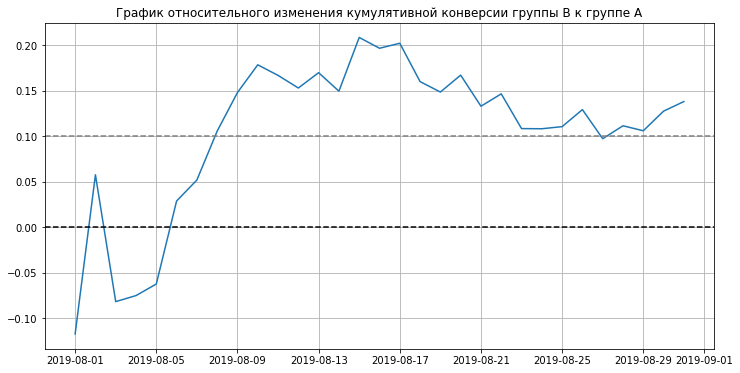

- В начале теста группа B значительно проигрывала группе A, затем вырвалась вперёд. Потом её конверсия слегка снижалась, относительно своего же максимума, но не группы A.
- В целом отношение конверсии на стороне группы B, но для лучшего понимания стоит проанализировать аномалии.

##### Вывод по точечному графику количества заказов по пользователям:


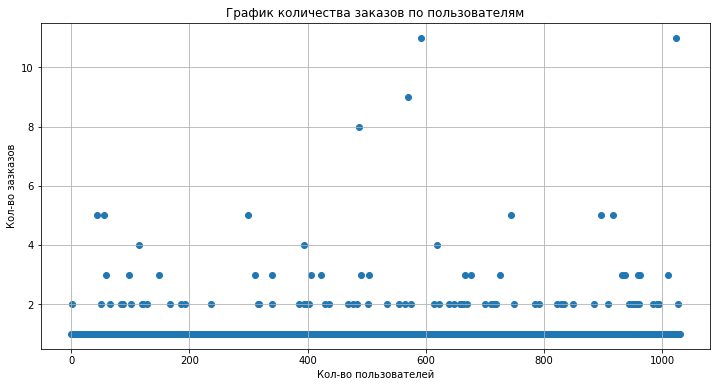

- Безусловно, большая часть пользователей совершила всего одну покупку. 
- Не столь редким явлением было и 2 покупки на одного пользователя, а вот 4 и больше встречается значительно реже. 


##### Вывод по  95-ому и 99-ому перцентилю количества заказов на пользователя:

- Не более 5% пользователей оформляли больше чем 2 заказа и не более 1% оформляли больше 4-х заказов.
- Разумно выбрать 2 заказа на одного пользователя за нижнюю границу числа заказов, и отсеять аномальных пользователей по ней.

#####  Вывод по точечному графику стоимостей заказов:

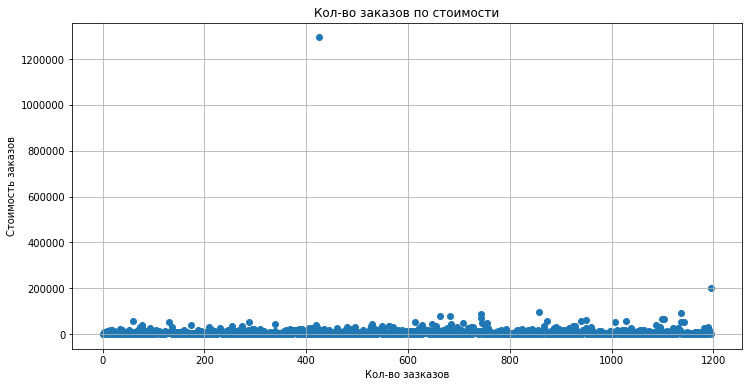

- Кажется, у нас появился оптовик. Заказ в 1,2 млн. для интернет-магазина выглядит очень большим и выбивается из общей массы. 
- Большая часть заказов у нас меньше 150 тыс. руб.

##### Вывод по  95-ому и 99-ому перцентилю стоимости заказов:

- Не более 5% заказов дороже 28 000 рублей и не более 1% дороже 58 233.2 рубля. 
- Мы считаем, что стоит отсеять заказы дороже 28 000 тыс. руб. Так мы сильно синизим шум и искажение нашего теста.

##### Вывод по  статистической значимости различий в конверсии между группами по «сырым» данным:

- Конверсия выше в группе B на 13,8%.
- Значит, нулевую гипотезу о том, что статистически значимых различий в конверсии между группами нет, отвергаем.

##### Вывод по статистической значимости различий в среднем чеке заказа между группами по «сырым» данным:

- p-value значительно выше 5%. Значит мы не будем отвергать нулевую гипотезу и считать, что в среднем чеке есть различия. Впрочем, средний чек группы B значительно выше среднего чека группы A, аж на 26%.
- Такие противоричивые вывлды скорее всего из-за анломалий, от которых мы не очистили выборки.

##### Вывод по статистической значимости различий в конверсии между группами по «очищенным» данным:

- p-value меньше 0.05. Значит, нулевую гипотезу о том, что статистически значимых различий в конверсии между группами нет, отвергаем. 
- Конверсия выше в группе B на 17,3%.

##### Вывод по статистической значимости различий в среднем чеке заказа между группами по «очищенным» данным:

- p-value увеличился, но и разница между сегментами сильно изменилась с +26% до -2%.

##### Общие выводы по результатам теста несколько изменились после их очистки от выбросов:

Имеющиеся факты:
- Есть статистически значимые различия по конверсии между группами и по «сырым», и по данным после фильтрации аномалий;
- Нет статистически значимого различия по среднему чеку между группами ни по «сырым», ни по данным после фильтрации аномалий, но после фильтрации аномалий средний чек группы B стал на. 2% ниже, чем у группы  B, хотя yна "сырых" данных был выше на 26%;
- График различия конверсии между группами сообщает, что результаты группы B значительно лучше группы A;
- График различия среднего чека говорит о том, что результаты группы B  чуть хуже чему группы B, но снижение среднего чека на 2% вполне коменсируется увеличением конверсии более чем на 10%

### Рекомендации:

- Исходя из обнаруженных фактов, тест следует остановить и признать его успешным. Группа B показала хорощий прирост по конверсии, который полностью нивелирует незначительное снижение среднего чека.
- Теперь самое время повышать лояльность новых пользователей, что приведет к увеличению среднего чека.